In [135]:
import numpy as np # needed for matrix/arrays
import math # always need math
import random # for fun
import pandas as pd # pandas are cute and dumb
import seaborn as sns # I don't know what this is for 
import matplotlib.pyplot as plt # neeeded for graphs
import sklearn # needed for ML and stats
from sklearn.feature_selection import SelectFromModel, chi2 ,SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from numpy.linalg import inv


In [188]:
# I am using pandas to create data frames
dfx = pd.read_csv("features.csv") # I removeed what seemed to be the x values
dfy = pd.read_csv("target.csv")
dfx.shape
dfx.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,10.320404,53.319480,51.733969,18.873686,24.454063,-7.194644,-34.519912,6.302196,18.908724,45.757267
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,19.435654,4.955477,-25.754959,26.569556,-7.682459,16.298635,33.227264,18.224573,43.485017,-15.870646
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,-18.693977,-16.762125,39.234918,-14.328085,63.590530,4.659525,-3.686370,63.073551,52.012870,61.688974
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,24.900168,-12.326538,-22.281440,25.984793,19.166837,30.875786,74.578619,38.611987,-7.820556,42.925407
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,32.039863,-5.085242,-2.238744,3.611687,15.436979,6.150152,-19.373782,-1.090460,-40.585079,30.630786


In [5]:
dfy.shape


(506, 2)

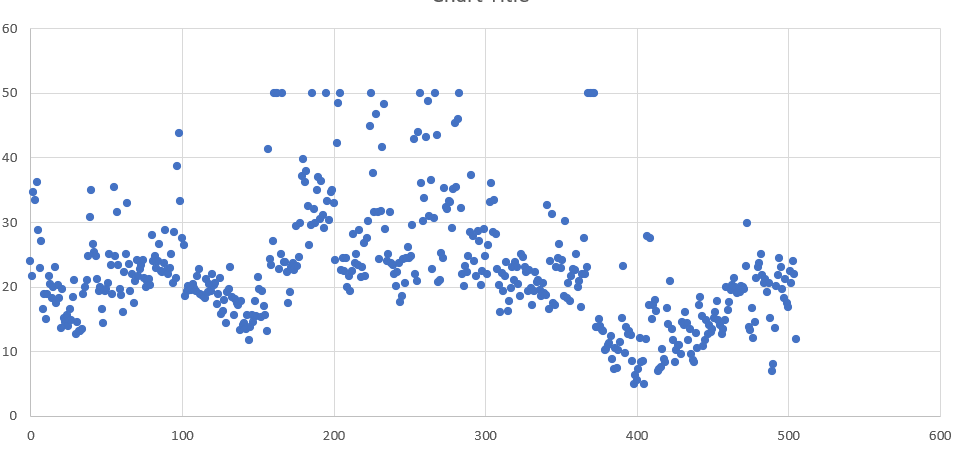


In [7]:
X = dfx
y = dfy
y.shape

(506, 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,  random_state = 1)

In [9]:
X_train.shape
y_train.shape

(339, 2)

This is for Linear regression


In [71]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
lin_pred = regression.predict(X_test)
print( mean_squared_error(y_test, lin_pred), regression.score(X_test, y_test))


12.140985905427522 0.862123185011332


array([[ 1.00000000e+00, -5.61704178e-16, -3.00378600e-16,
         2.79181353e-17,  3.10006872e-15, -9.59565623e-14,
        -6.72744910e-15, -5.76611543e-17,  8.76880660e-17,
         1.74262293e-16,  4.45109428e-16, -1.10414597e-15,
        -1.42258314e-16, -6.24239826e-17, -4.10958361e-17,
        -1.10190540e-17, -2.11551689e-17,  2.72743311e-17,
         5.09243102e-17,  2.33231022e-17, -2.36357317e-17,
        -9.74840278e-18,  6.19773760e-17,  1.97096066e-17,
        -6.74298326e-17, -2.60103105e-17, -1.01642023e-17,
        -4.19018449e-17,  7.71071227e-18,  7.37352408e-17,
        -4.24741228e-17, -4.61429611e-17,  3.88616620e-17,
         3.56654046e-17,  5.63110600e-17, -5.82597748e-17,
         1.04526820e-16,  4.74420694e-17,  1.24949938e-17,
         2.99729316e-18,  1.90827187e-18,  3.09047191e-17,
        -5.71845670e-18,  3.79935161e-18, -3.36835197e-17,
         1.00951245e-16,  1.47013109e-17,  3.47496472e-17,
         4.33685507e-17,  5.11561545e-17, -4.24004192e-1

In [11]:
## I imported lasso in the beginining
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [261]:
lasso = Lasso(alpha = .50)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test) # these are the predice values
mean_squared_error(y_test, y_pred)
print( mean_squared_error(y_test, y_pred), lasso.score(X_test, y_test))

13.674590085568319 0.8447071647041678


In [262]:
ridge =  Ridge(alpha= .50)
ridge.fit(X_train, y_train)
ridgey_pred = ridge.predict(X_test)

print( mean_squared_error(y_test, ridgey_pred), ridge.score(X_test, y_test) )

12.097189372542422 0.8626205520736281


In [31]:
## now we're going to loop throug many values. We're looping with cross validatioon so that we can minimize the MSE
## we will use loops to help with finding the right lambda value.
lastmse = 0
for i in np.arange(0.0001, 1.0, 0.001):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)
    lasso = Lasso(alpha = i )
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mean_squared_error(y_test, y_pred)
    if (mean_squared_error(y_test, y_pred)) < lastmse:
        print("Lambda=", i ," ", "MSE= ", mean_squared_error(y_test, y_pred))
    lastmse = mean_squared_error(y_test, y_pred)

Lambda= 0.0011   MSE=  12.13381999107457
Lambda= 0.0021   MSE=  12.127816769778036
Lambda= 0.0031   MSE=  12.122299885483894
Lambda= 0.0041   MSE=  12.117268909131955
Lambda= 0.0051   MSE=  12.11272358024492
Lambda= 0.0061   MSE=  12.108664251860768
Lambda= 0.0071   MSE=  12.105090439331372
Lambda= 0.0081   MSE=  12.10200281453388
Lambda= 0.0091   MSE=  12.099400522962485
Lambda= 0.0101   MSE=  12.097283986184408
Lambda= 0.011099999999999999   MSE=  12.095653196590188
Lambda= 0.0121   MSE=  12.094508904141637
Lambda= 0.0131   MSE=  12.093849650409611
Lambda= 0.0141   MSE=  12.093676146633127


In [246]:
lasso = Lasso(alpha =   .0141 )
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print( lasso.coef_)

[[ 9.99999340e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.48664885e-03 -7.16638149e-02  8.17682397e-02  6.81778771e-02
   2.98972645e+00 -1.17843776e+01  3.53368391e+00  6.22954660e-03
  -1.37453545e+00  3.2074

In [77]:
newlassocoef = []

for i in range(1,51):
    if (lasso.coef_[1][i]) > .11:
        newlassocoef.append(i)
        
print(newlassocoef)

[2, 3, 4, 6, 9, 16, 21, 24, 27, 38, 50]


In [20]:
for itt in np.arange(0.0141   , 90, 0.5):
    lasso = Lasso(alpha =   itt  )
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print("MSE = ", mean_squared_error(y_test, y_pred) , "R^2 = " ,lasso.score(X_test, y_test))

MSE =  12.093676146633127 R^2 =  0.8626604494105851
MSE =  13.746031619852896 R^2 =  0.8438958561852987
MSE =  16.37302939661061 R^2 =  0.8140630538256489
MSE =  17.64898388242207 R^2 =  0.7995732518438025
MSE =  18.58866122055102 R^2 =  0.7889024500571222
MSE =  19.421868985113726 R^2 =  0.7794408821232177
MSE =  19.978450093702794 R^2 =  0.7731209048336083
MSE =  20.411366272164674 R^2 =  0.768205437218169
MSE =  20.447955537526397 R^2 =  0.767790913625283
MSE =  20.49994461290806 R^2 =  0.7672016372316686
MSE =  20.58729342499987 R^2 =  0.7662109368970335
MSE =  20.70889280010553 R^2 =  0.7648314087431183
MSE =  20.855387063040073 R^2 =  0.7631692987294042
MSE =  21.001938547792136 R^2 =  0.7615066711221772
MSE =  21.171714972697888 R^2 =  0.7595804261007447
MSE =  21.362593707637583 R^2 =  0.7574146689134442
MSE =  21.573646676111018 R^2 =  0.7550199390858882
MSE =  21.71463877381845 R^2 =  0.7534209745494054
MSE =  21.806346504513957 R^2 =  0.752381830860396
MSE =  21.912823149449

In [21]:
## Here we're counting the 
listt = []
MSEval = []
for itt in np.arange(1 , 50, 1):
    lasso = Lasso(alpha =   itt   )
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    coeff = lasso.coef_
    count = (coeff[1] == 0).sum()
    listt.append(count)
    MSEval.append(mean_squared_error(y_test, y_pred))
    print( "MSE=", round(mean_squared_error(y_test, y_pred)), " Zero-Count=", count,  " Lambda= ", itt )

MSE= 16  Zero-Count= 8  Lambda=  1
MSE= 19  Zero-Count= 14  Lambda=  2
MSE= 20  Zero-Count= 19  Lambda=  3
MSE= 20  Zero-Count= 23  Lambda=  4
MSE= 21  Zero-Count= 28  Lambda=  5
MSE= 21  Zero-Count= 32  Lambda=  6
MSE= 21  Zero-Count= 32  Lambda=  7
MSE= 22  Zero-Count= 34  Lambda=  8
MSE= 22  Zero-Count= 37  Lambda=  9
MSE= 22  Zero-Count= 38  Lambda=  10
MSE= 22  Zero-Count= 39  Lambda=  11
MSE= 23  Zero-Count= 39  Lambda=  12
MSE= 23  Zero-Count= 41  Lambda=  13
MSE= 23  Zero-Count= 42  Lambda=  14
MSE= 24  Zero-Count= 42  Lambda=  15
MSE= 24  Zero-Count= 43  Lambda=  16
MSE= 24  Zero-Count= 43  Lambda=  17
MSE= 25  Zero-Count= 43  Lambda=  18
MSE= 25  Zero-Count= 43  Lambda=  19
MSE= 25  Zero-Count= 44  Lambda=  20
MSE= 26  Zero-Count= 44  Lambda=  21
MSE= 26  Zero-Count= 44  Lambda=  22
MSE= 27  Zero-Count= 44  Lambda=  23
MSE= 27  Zero-Count= 46  Lambda=  24
MSE= 28  Zero-Count= 46  Lambda=  25
MSE= 28  Zero-Count= 46  Lambda=  26
MSE= 29  Zero-Count= 45  Lambda=  27
MSE= 30  Ze

Text(0, 0.5, 'Zero Coefficients: Blue. MSE: Orange')

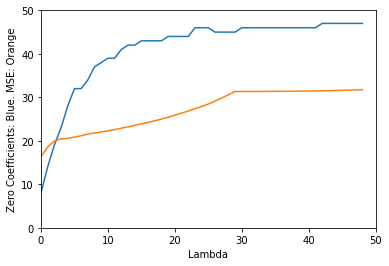

In [29]:
plt.plot(listt)
plt.plot(MSEval)

plt.xlim([0, 50])
plt.ylim([0, 50])
plt.xlabel('Lambda')
plt.ylabel('Zero Coefficients: Blue. MSE: Orange')

## I think we should stop at lambda = 23 because then 46 coeficient turn zero 


In [53]:
pcalist = []

for itter in np.arange(.01 , .99, .01):
    pca = PCA(itter)
    pca.fit_transform(X)
    PCA_of_X = pca.fit_transform(X)
    pcalist.append(PCA_of_X.shape[1])

In [51]:
pca.explained_variance_ratio_

array([0.53108574, 0.10856651, 0.07311851, 0.01230447, 0.01171914,
       0.01130999, 0.01110528, 0.01033582, 0.01008608, 0.00970541,
       0.00945147, 0.00912044, 0.0088492 , 0.00858337, 0.00836713,
       0.00823583, 0.00797266, 0.00782171, 0.00769005, 0.00749692,
       0.00738549, 0.00730042, 0.00705926, 0.00699545, 0.00676006,
       0.00657141, 0.0064175 , 0.00639399, 0.00622791, 0.00607382,
       0.00585982, 0.0057244 , 0.00545229, 0.0053774 , 0.00533095,
       0.00516429, 0.00487807, 0.00477246])

Text(0, 0.5, '# of principle components ')

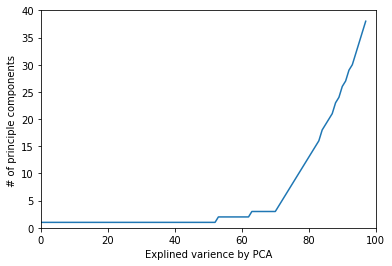

In [58]:
plt.plot(pcalist)

plt.xlim([0,100])
plt.ylim([0,40])
plt.xlabel('Explined varience by PCA')
plt.ylabel('# of principle components ')


In [203]:
#it looks like we ca capture most of the varience with 3 principal components
pca = PCA(.7121)
pca.fit_transform(X)
PCA_of_X = pca.fit_transform(X)
PCA_of_X.shape

(506, 3)

In [199]:
## Below I will try to train simple regression on PCA with 3 compomponents.
regression = linear_model.LinearRegression()
regression.fit(PCA_of_X, y)

PCAlin_pred = regression.predict(PCA_of_X)
print( mean_squared_error(y, PCAlin_pred), regression.score(PCA_of_X, y))

34.347495491477176 0.6287684477295732


In [104]:

PCA_of_X.shape

(506, 3)

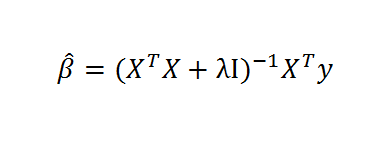


In [207]:
# I will try to convert dataframe to array and 
# then I will use numpy to do all do the hard work.
lamb = 1
x_array = dfx.to_numpy()
x_arrayT = x_array.transpose()
y_array = dfy.to_numpy()

xprod = np.matmul(x_arrayT, x_array)

identity = np.identity(xprod.shape[1])

lambdaidentity = lamb*identity

insideinv = np.add(xprod,lambdaidentity)

inversematrix = inv(insideinv)

xTy = np.matmul(x_arrayT,y_array )

myridgcoef = np.matmul(inversematrix, xTy)
np.matmul(inversematrix, xTy)


array([[ 9.99999788e-01, -2.17384913e-03],
       [-1.22512953e-07, -8.25239998e-02],
       [ 1.22929502e-07,  6.18448888e-02],
       [-5.35660546e-08, -1.16869145e-02],
       [ 1.69338684e-06,  3.22978157e+00],
       [ 6.49799908e-06, -5.17294872e-01],
       [ 3.34677734e-06,  5.70324292e+00],
       [-2.25388859e-07, -1.86920995e-03],
       [-1.68529287e-06, -9.95335693e-01],
       [ 1.56765322e-06,  1.80736691e-01],
       [ 6.81455772e-08, -1.00740135e-02],
       [ 3.86100433e-07, -3.83740474e-01],
       [-1.70609619e-10,  1.58759954e-02],
       [ 3.20484325e-08, -4.32291407e-01],
       [-4.40763042e-08, -1.80126844e-02],
       [-1.34958310e-08,  3.34822412e-03],
       [-4.89889689e-08,  5.70731228e-03],
       [-5.86110592e-08,  1.56553095e-02],
       [ 1.99378876e-08, -2.23837881e-02],
       [ 3.43329067e-08, -7.22836963e-04],
       [-4.21778227e-08, -6.42513141e-03],
       [-7.42227521e-08,  1.15467649e-02],
       [ 6.39597266e-08,  2.59354889e-03],
       [-2.

In [250]:
newrig =  Ridge(alpha= .0141)
newrig.fit(X, y)
ridgey_pred = newrig.predict(X)
print( newrig.coef_ )


[[ 9.99999997e-01 -1.72401243e-09  1.73748869e-09 -9.75984711e-10
   2.40711062e-08  1.23044070e-07  4.34823397e-08 -3.22215626e-09
  -2.39020625e-08  2.22567020e-08  9.49508923e-10  4.97138262e-09
  -1.07424209e-11  1.89621283e-10 -6.27115474e-10 -2.02485911e-10
  -6.88472411e-10 -8.38537342e-10  2.77174555e-10  4.92756769e-10
  -5.96224684e-10 -1.04692095e-09  8.95137394e-10 -4.04592682e-10
  -8.02598430e-10 -1.62546558e-11 -5.95157578e-10  1.22734034e-11
  -7.55023967e-10 -1.24367009e-10 -1.04044441e-10  8.52744715e-10
  -2.45160794e-10  8.45123921e-10 -1.47619568e-10 -1.24956466e-09
   1.09776824e-09  6.21061672e-10  2.39057137e-10 -5.73624317e-10
   5.99367733e-10  9.43306960e-10  1.87413928e-11  1.11719970e-09
   6.44903257e-10  4.63860516e-10 -3.55484408e-10 -1.16198415e-09
   5.52800510e-10  3.06932585e-10  3.64035954e-10]
 [-2.25849086e-03 -9.76474353e-02  5.84773392e-02  1.70319954e-02
   3.09510119e+00 -1.52911986e+01  3.73300772e+00  4.69826567e-03
  -1.48739069e+00  3.1745

(-10.0, 5.0)

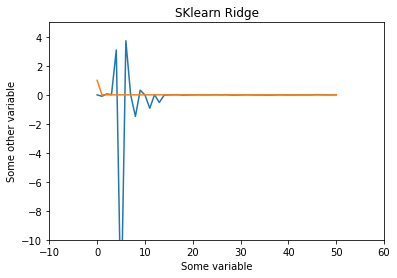

In [251]:
plt.plot(newrig.coef_[1])
plt.plot(newrig.coef_[0])

plt.title("SKlearn Ridge")
plt.xlabel('Some variable')
plt.ylabel('Some other variable')


plt.xlim([-10,60])
plt.ylim([-10,5])

(-10.0, 5.0)

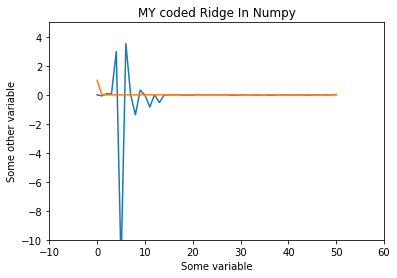

In [252]:

plt.plot(lasso.coef_[1])
plt.plot(lasso.coef_[0])

plt.title("MY coded Ridge In Numpy")
plt.xlabel('Some variable')
plt.ylabel('Some other variable')

plt.xlim([-10,60])
plt.ylim([-10,5])